In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect
from sqlalchemy import func
from sqlalchemy import distinct

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session



In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
inspector = inspect(engine)

# Exploratory Climate Analysis

In [12]:
# Get the columns for Measure Class

column_measure = inspector.get_columns('measurement')
for columns in column_measure:
    print(columns['name'],columns['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
#Get the columns for Station Class

column_station = inspector.get_columns('station')
for columns in column_station:
    print(columns['name'],columns['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# Calculate the last data point for date
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date[0]

'2017-08-23'

In [15]:

# Calculate the date 1 year ago from the last data point in the database

year_ago= dt.date(2017,8,23) - dt.timedelta(days=365)
print("Year Ago from last date:" ,year_ago)
print("Last Date :", last_date[0])

Year Ago from last date: 2016-08-23
Last Date : 2017-08-23


In [16]:
# Perform a query to retrieve the date and precipitation scores

dates_prcp = session.query(Measurement.date,Measurement.prcp).all()


pdf = pd.DataFrame(dates_prcp,columns = ["Dates","Precipitation"])

# Save the query results as a Pandas DataFrame and set the index to the date column

pdf.set_index("Dates", inplace=True)


# Sort the dataframe by date

pdf.sort_index(ascending=False, inplace=True)
pdf = pdf.dropna(how='any')
pdf.reset_index(drop = True,inplace=True)
pdf.head()


,Precipitation
0,0.45
1,0.08
2,0.00
3,0.00
4,0.00


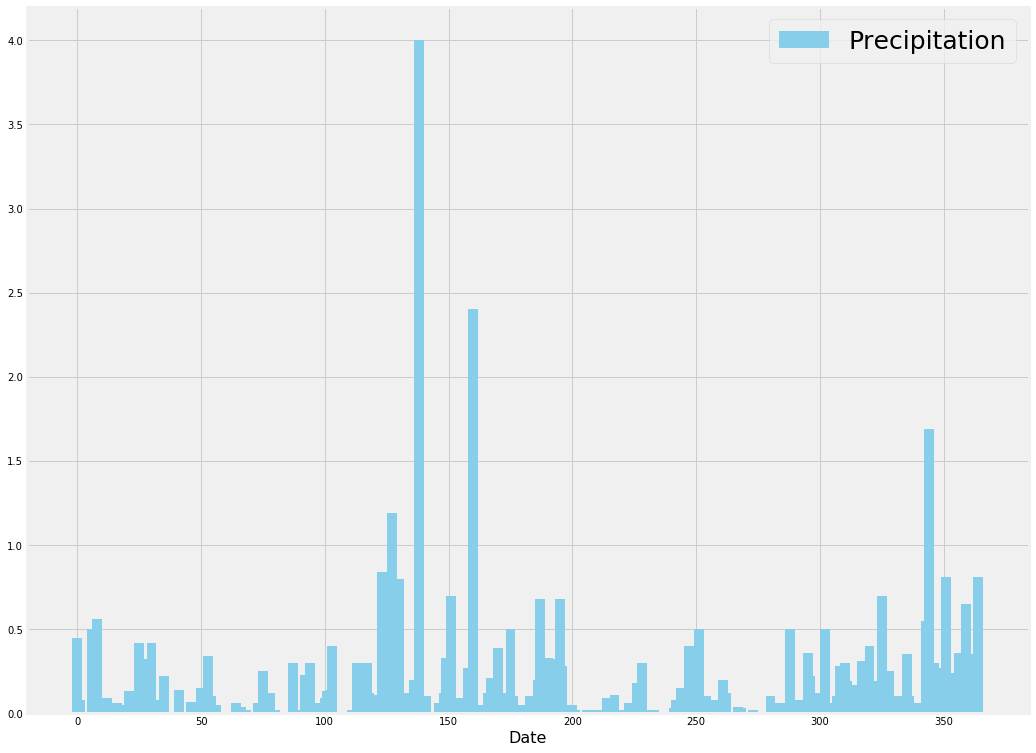

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

yearly = pdf.iloc[0:365, 0:1]
yearly = yearly.dropna(how ="any")
x = range(len(yearly))

#Use Pandas Plotting with Matplotlib to plot the data(Run this cell twice to enlarge the fig size as its rcparams)


plt.bar(x, yearly["Precipitation"],4, color ="skyblue")
plt.rcParams["figure.figsize"] = [16,13]
plt.legend(yearly,fontsize=25)
plt.xlabel('Date', fontsize=16)
plt.savefig('Precipitation yearly.png')
plt.show()


In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pdf.describe()

,Precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [22]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.id)).all()

[(9)]

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
                  group_by(Measurement.station).\
                  order_by(func.count(Measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Get the most active station from list of most active station(s) 

most_active_station = active_stations[0][0]

most_active_station

'USC00519281'

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == most_active_station).all()

[(54.0, 85.0, 71.66378066378067)]

In [26]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        12 months of temperature observations
    """
    
    return session.query(Measurement.tobs).\
        filter (Measurement.station == most_active_station).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


#Call the function in a variable

trip_temps = (calc_temps('2016-08-23', '2017-08-23'))

trip_temps

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [27]:
# Create a dataframe/series object 
trip_temps_df = pd.DataFrame(trip_temps)
trip_temps_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


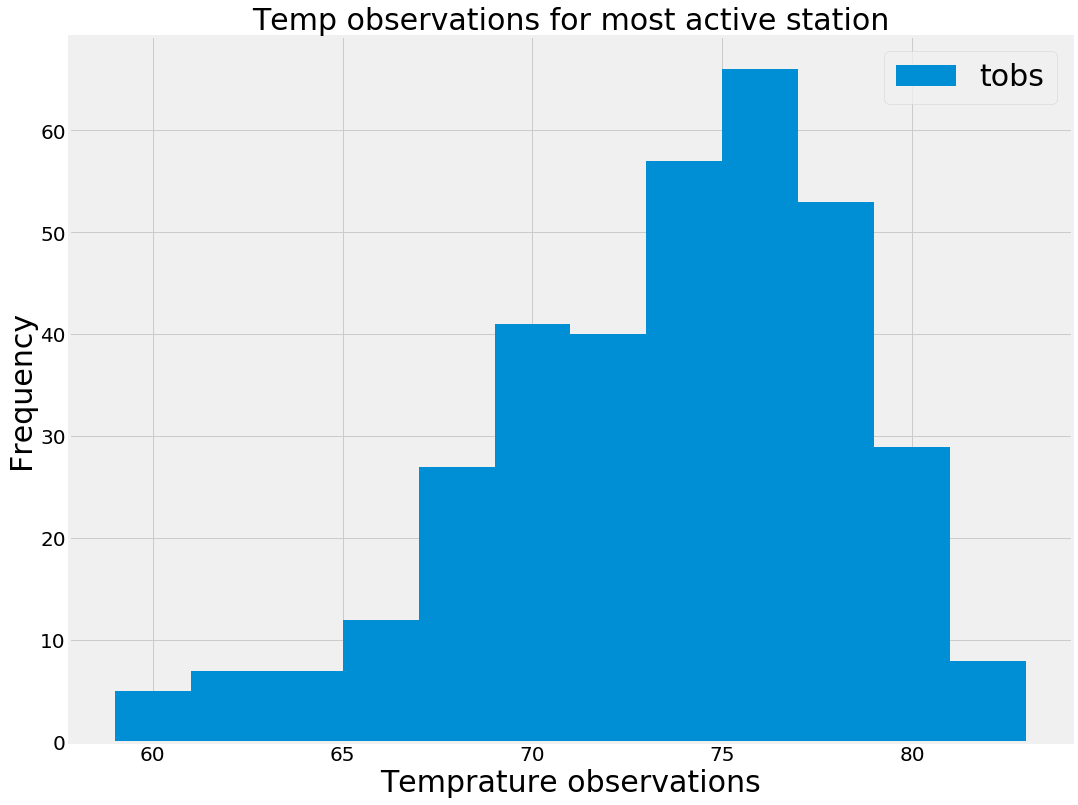

In [33]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
trip_temps_df.hist(bins=12,xlabelsize=20,ylabelsize=20)
plt.xlabel("Temprature observations",fontsize=30)
plt.ylabel("Frequency",fontsize=30)
plt.title("Temp observations for most active station",fontsize = 30)
plt.legend(trip_temps_df, fontsize =30)
plt.savefig('Temp Observations most active.png')
plt.show()

In [30]:
###### This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

#Call the function in a variable

trip_temps = (calc_temps('2016-08-23', '2017-08-23'))

# Slice the list and assisgn the variables for plotting

t_min = trip_temps[0][0]
t_avg = trip_temps[0][1]
t_max = trip_temps[0][2]
trip_temps

[(58.0, 74.59058295964125, 87.0)]

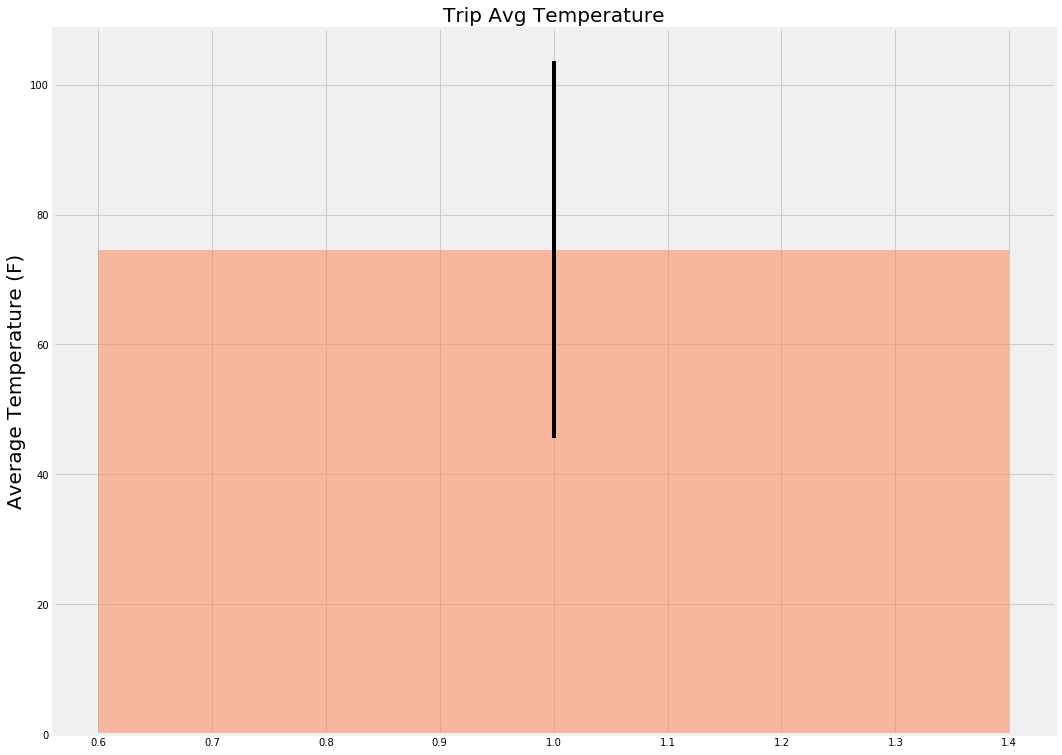

In [32]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

peak_to_peak = t_max - t_min


plt.bar(1, t_avg, yerr = peak_to_peak,align='center',color = "coral",alpha=0.5, ecolor='black')
plt.ylabel('Average Temperature (F)',fontsize=20)
plt.title('Trip Avg Temperature',fontsize=20)

# Save the figure and show

plt.savefig('Trip_Avg with_error_bars.png')
plt.show()

In [115]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [Measurement.station,Station.name,func.avg(Measurement.prcp),Station.latitude,Station.longitude,Station.elevation]

rainfall_per_weather = session.query(*sel).\
filter(Measurement.station == Station.station).\
filter (Measurement.date >= '2015-08-23').filter(Measurement.date <= '2016-08-23').\
group_by(Station.name).\
order_by(func.avg(Measurement.prcp).desc()).all()

rainfall_per_weather

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  0.570480769230769,
  21.3331,
  -157.8025,
  152.4),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  0.2966120218579237,
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  0.19997245179063358,
  21.4234,
  -157.8015,
  14.6),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  0.17814102564102566,
  21.33556,
  -157.71139,
  19.5),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  0.14719178082191783,
  21.5213,
  -157.8374,
  7.0),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  0.14107142857142857,
  21.3152,
  -157.9992,
  0.9),
 ('USC00517948',
  'PEARL CITY, HI US',
  0.12666666666666668,
  21.3934,
  -157.9751,
  11.9),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  0.06485013623978202,
  21.2716,
  -157.8168,
  3.0),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 0.0, 21.4992, -158.0111, 306.6)]